1. Import Libraries

In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

2. Load Data

In [2]:
data = pd.read_csv("/content/Housing.csv")
data.head() #Initial five column of data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


3. EDA

In [3]:
data.dtypes # Inspect the data types of columns

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [4]:
data.describe()  # Generate the summary statistics

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
data.sample(10) # Take a random sample of 10 rows from the DataFrame

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
426,3353000,2700,3,1,1,no,no,no,no,no,0,no,furnished
469,3010000,4600,2,1,1,yes,no,no,no,no,0,no,furnished
113,6083000,9620,3,1,1,yes,no,yes,no,no,2,yes,furnished
495,2730000,4000,3,1,2,yes,no,no,no,no,1,no,unfurnished
522,2380000,2475,3,1,2,yes,no,no,no,no,0,no,furnished
168,5250000,4260,4,1,2,yes,no,yes,no,yes,0,no,furnished
330,3990000,4050,2,1,2,yes,yes,yes,no,no,0,yes,unfurnished
206,4900000,5800,2,1,1,yes,yes,yes,no,yes,0,no,semi-furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
253,4515000,3520,2,1,2,yes,no,no,no,no,0,yes,furnished


In [6]:
data.info()     # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
 #find duplicate value
data[data.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [8]:
#Percentage of Missing values in the Dataset
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


4. Visualization

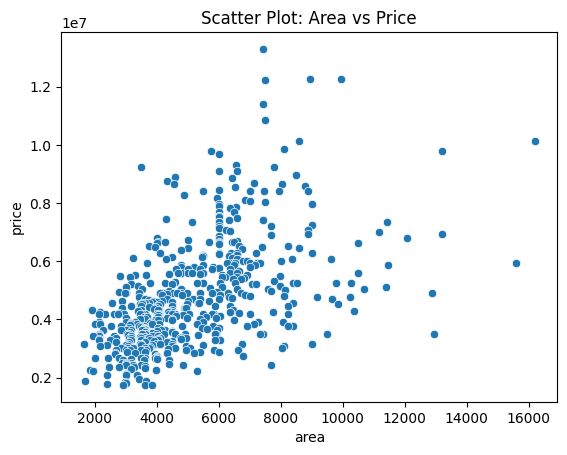

In [9]:
# Visualization - Scatter plot of 'price' vs 'area'
# Scatter Plot
sns.scatterplot(x='area', y='price', data=data)
plt.title('Scatter Plot: Area vs Price')
plt.show()

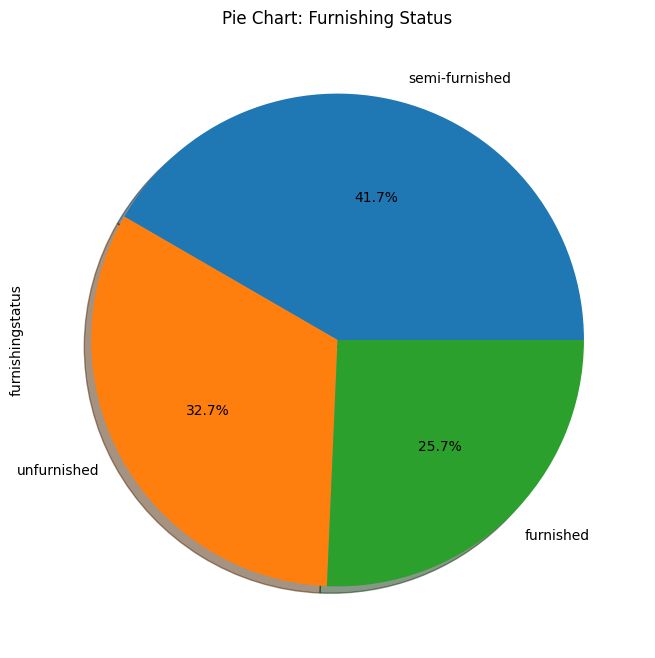

In [10]:
# Pie Chart
plt.figure(figsize=(8, 8))
data['furnishingstatus'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Pie Chart: Furnishing Status')
plt.show()

In [11]:
# Count
print(data['airconditioning'].value_counts())

no     373
yes    172
Name: airconditioning, dtype: int64


<Axes: xlabel='area', ylabel='count'>

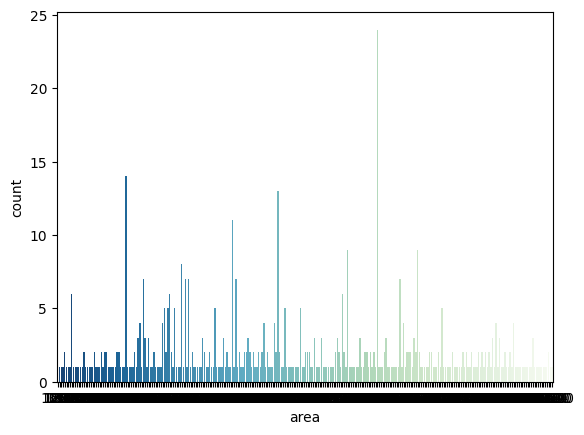

In [12]:
#create the count plot
sns.countplot(data=data,x="area",palette="GnBu_r")

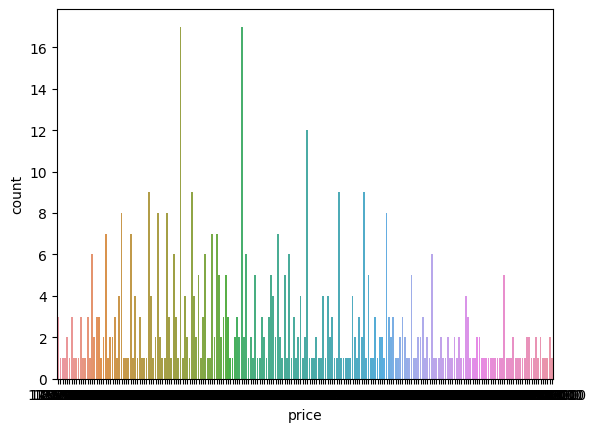

In [13]:
#create the count plot
sns.countplot(data=data,x='price')
plt.show()

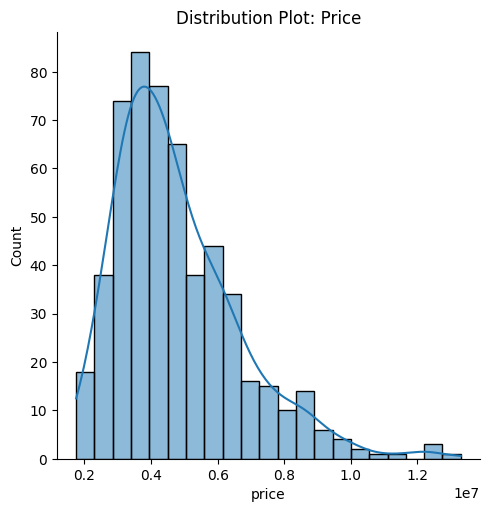

In [14]:
# Distribution Plot (Displot)
sns.displot(data['price'], kde=True)
plt.title('Distribution Plot: Price')
plt.show()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


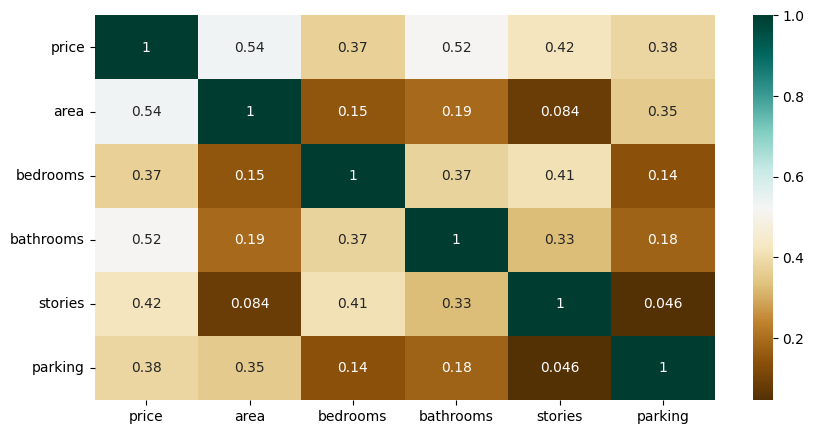

In [15]:
# Heatmap for correlation
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [16]:
# Statistical summary
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [17]:
# Information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [18]:
# Missing values check
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

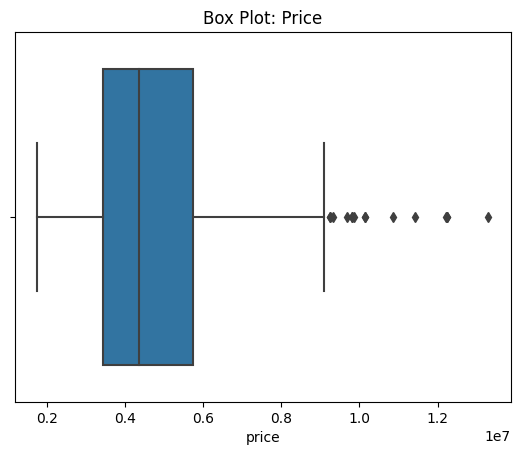

In [19]:
# Outliers check
sns.boxplot(x='price', data=data)
plt.title('Box Plot: Price')
plt.show()

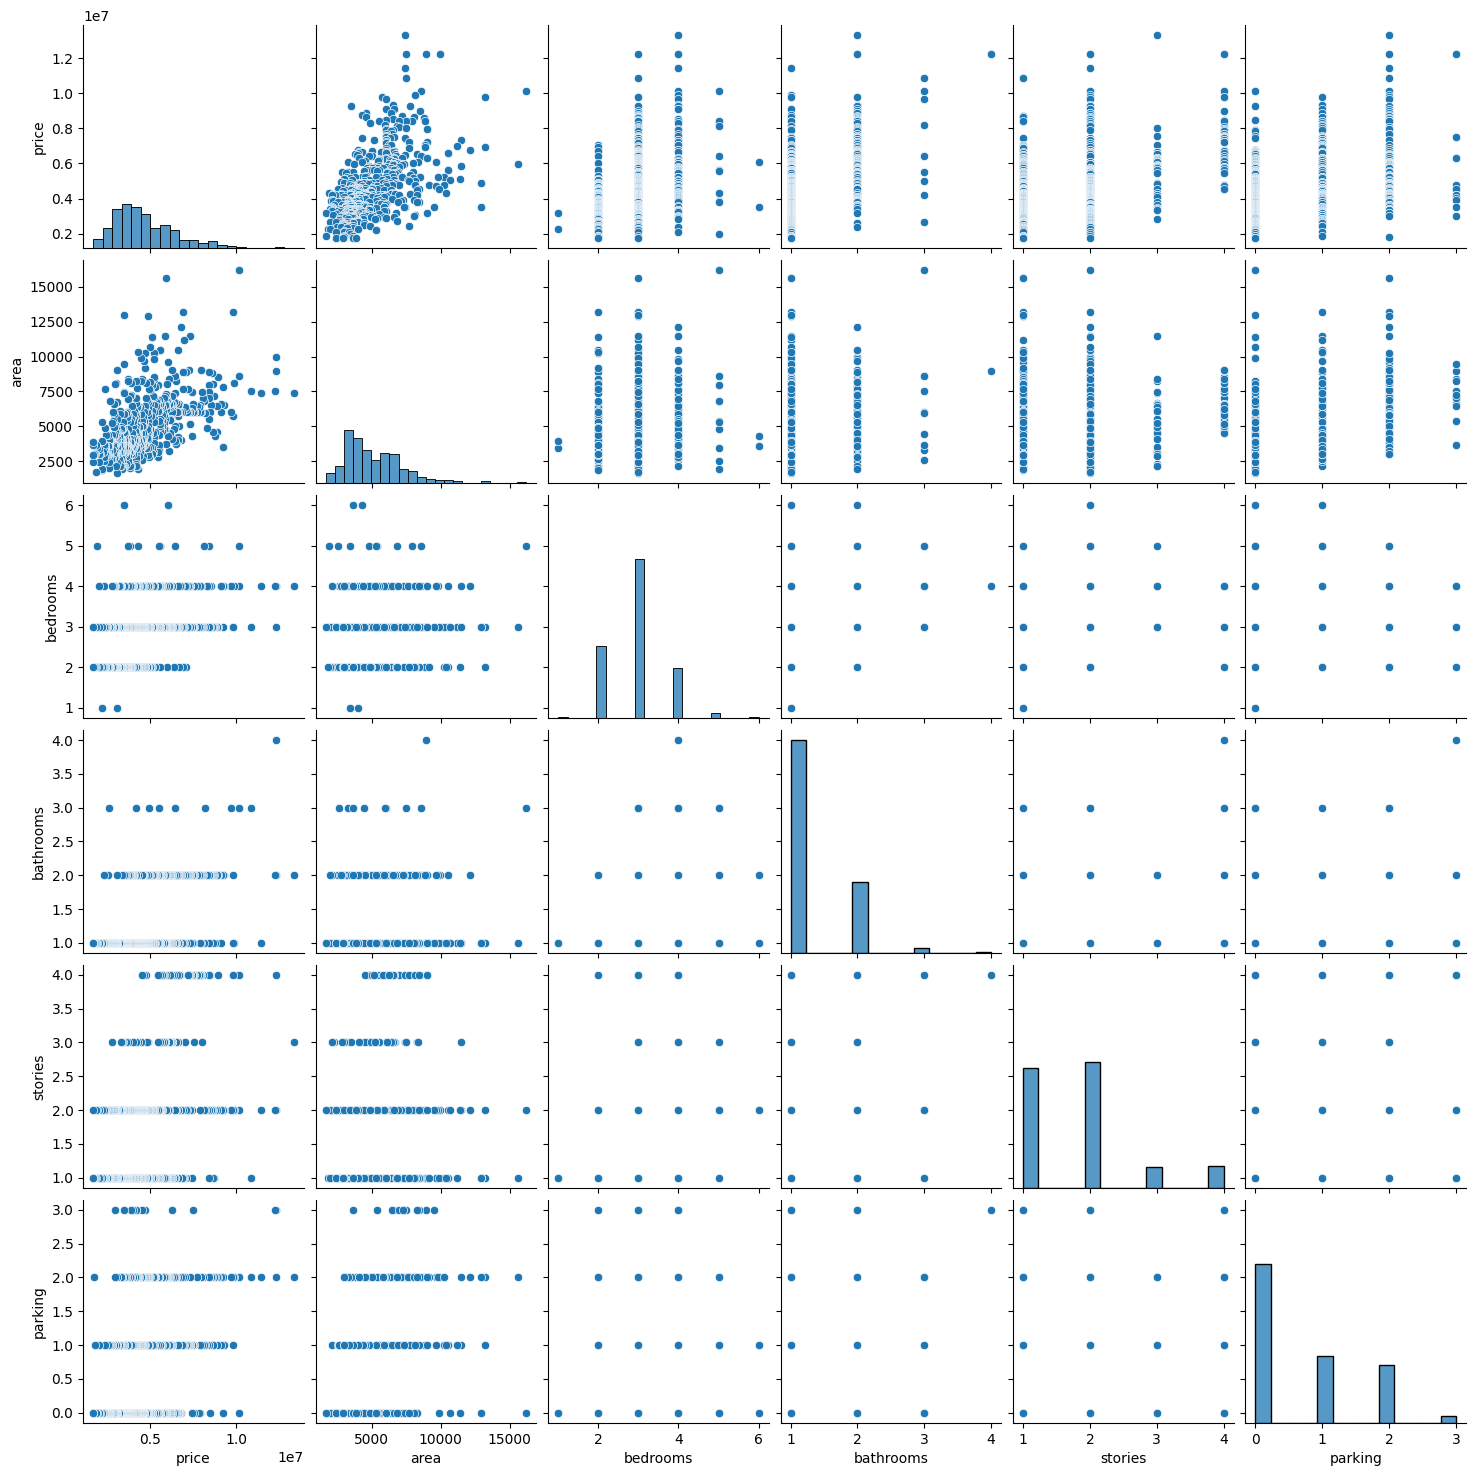

In [20]:
#create the pairwise scatter plot matrix.  numerical column is compared with every other numerical column in the DataFrame
sns.pairplot(data=data)

In [21]:
# Assuming you have a DataFrame named 'data' containing numerical columns.

Q1 = data.quantile(0.25)  # Calculate the first quartile (Q1) for each column
Q3 = data.quantile(0.75)  # Calculate the third quartile (Q3) for each column
IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR) for each column
print(IQR)


price        2310000.0
area            2760.0
bedrooms           1.0
bathrooms          1.0
stories            1.0
parking            1.0
dtype: float64


In [22]:
# Skewness check
data.skew()

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

5. Data Pre-processing

Encoding

In [23]:
# Processing - Encoding categorical variables
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()
data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']]=oe.fit_transform(data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']])

Scaling

In [24]:
# Scaling numerical variables
scaler = StandardScaler()
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

Splitting

In [25]:
# Splitting the data into train and test sets
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

6. Data Modelling - Logistic Regression

In [26]:
# Model fitting - Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

7. Predection - Logistic Regression

In [27]:
# Prediction using Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)

In [28]:
logistic_model.intercept_  # Get the intercept of the logistic regression model

array([-0.67834375,  0.63161319, -0.24972492, -0.74202424, -0.61252166,
       -0.38526556, -0.43927879, -0.44485   , -1.04663898, -0.98373394,
        0.45920481, -0.28556868, -1.0861772 ,  0.81550899,  0.10208219,
        0.16726116, -0.40136462, -1.20516656,  0.96460409, -0.94364937,
       -0.33033893, -0.97263697,  2.68699941, -0.96945771, -0.12893066,
        2.68907476, -0.07602973,  0.02371156,  2.55934844,  1.1339779 ,
       -0.93462456, -0.48535944, -0.25980075, -0.95651303, -0.8246109 ,
        2.12365331,  2.00468193,  0.90751861,  2.08434267, -0.84488809,
        0.07006479,  1.29060872,  0.9005793 , -0.93969791, -0.55377387,
        0.40074991,  0.18213195,  1.9407612 , -0.84518206,  2.65991678,
        0.11896226, -1.06655126,  1.55483854,  1.5477221 ,  0.46039048,
        1.16709074, -0.35489546,  1.62270575,  1.52263596,  0.10391296,
       -0.678693  ,  1.64428326,  0.89402258,  1.70482015,  2.27537514,
       -0.31645369,  0.72605515,  1.12652062,  1.19078976, -0.09

In [29]:
logistic_model.coef_  # Get the coefficients of the logistic regression model

array([[-0.40744115, -0.29174811, -0.27299565, ..., -0.52583095,
        -0.25471137,  0.8492645 ],
       [-0.69857167,  0.19979821, -0.24207394, ..., -0.34684744,
        -0.14675296, -0.15625186],
       [-0.53922662, -0.62136703, -0.17983303, ...,  0.39631228,
        -0.12942741,  0.54795685],
       ...,
       [ 0.44107717,  0.71866533, -0.45037858, ...,  0.68183136,
        -0.32231683, -0.5820137 ],
       [ 0.35559383,  0.61348132,  0.51408892, ...,  1.21814541,
         0.52520409, -0.54840716],
       [ 0.45509667,  0.26442522,  1.51382407, ...,  0.71086451,
        -0.08474655, -0.27509038]])

8. Model Evaluation

In [30]:
# Evaluation of model - Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)

Accuracy (Logistic Regression): 0.01834862385321101


Linear Regression


9. Data Modelling - Linear Regression

In [31]:
# Model fitting - Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

10. Predection - Linear Regression

In [32]:
# Prediction using Linear Regression
y_pred_linear = linear_model.predict(X_test)


11. Model Evaluation

In [33]:
# Evaluation of model - Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)
print("R-squared (Linear Regression):", r2_linear)

Mean Squared Error (Linear Regression): 1771751116594.0398
R-squared (Linear Regression): 0.6494754192267794


12. Predicting User Define Values

In [34]:
def new_prediction(): #creating a new function name new_prediction
  area=float(input('Enter area : '))
  bedrooms=float(input('Enter No. of bedrooms : '))
  bathrooms=float(input('Enter the No. of bathrooms : '))
  stories=int(input('Enter stories : '))
  mainroad=int(input('Is it near to mainroad : '))
  guestroom=int(input('Enter  guestroom in 0 and 1 : '))
  basement =int(input('Enter basement in 0 and 1 : '))
  hotwaterheating=int(input(' Enter hotwaterheating in 0 and 1 : '))
  airconditioning =int(input('Enter airconditioning  : ' ))
  parking =int(input('Enter No. of parking : '))
  prefarea=int(input('Enter prefarea in 0 and 1 : '))
  furnishingstatus=int(input('Enter furnishingstatus : '))
  return ([[area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus]])

In [36]:
# Predicting using Linear Regression
predicted_price = linear_model.predict(new_prediction())
print("Predicted Price for the new data:", predicted_price[0])

Enter area : 2
Enter No. of bedrooms : 5
Enter the No. of bathrooms : 5
Enter stories : 3
Is it near to mainroad : 1
Enter  guestroom in 0 and 1 : 1
Enter basement in 0 and 1 : 1
 Enter hotwaterheating in 0 and 1 : 0
Enter airconditioning  : 1
Enter No. of parking : 1
Enter prefarea in 0 and 1 : 1
Enter furnishingstatus : 1
Predicted Price for the new data: 11556940.301479392
